# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
darwin_df = pd.read_csv('DARWIN/DARWIN.csv')
darwin_df

ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
0      id_1       5160     0.000013    120.804174       86.853334   
1      id_2      51980     0.000016    115.318238       83.448681   
2      id_3       2600     0.000010    229.933997      172.761858   
3      id_4       2130     0.000010    369.403342      183.193104   
4      id_5       2310     0.000007    257.997131      111.275889   
..      ...        ...          ...           ...             ...   
169  id_170       2930     0.000010    241.736477      176.115957   
170  id_171       2140     0.000009    274.728964      234.495802   
171  id_172       3830     0.000008    151.536989      171.104693   
172  id_173       1760     0.000008    289.518195      196.411138   
173  id_174       2875     0.000008    235.769350      178.208024   

     max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  \
0                 957              6601          0.361800            0.217459   
1                1694              6998          0.272513            0.144880   
2                2333              5802          0.387020            0.181342   
3                1756              8159          0.556879            0.164502   
4                 987              4732          0.266077            0.145104   
..                ...               ...               ...                 ...   
169              1839              6439          0.253347            0.174663   
170              2053              8487          0.225537            0.174920   
171              1287              7352          0.165480            0.161058   
172              1674              6946          0.518937            0.202613   
173              1838              6560          0.567311            0.147818   

     mean_gmrt1  ...  mean_jerk_in_air25  mean_jerk_on_paper25  \
0    103.828754  ...            0.141434              0.024471   
1     99.383459  ...            0.049663              0.018368   
2    201.347928  ...            0.178194              0.017174   
3    276.298223  ...            0.113905              0.019860   
4    184.636510  ...            0.121782              0.020872   
..          ...  ...                 ...                   ...   
169  208.926217  ...            0.119152              0.020909   
170  254.612383  ...            0.174495              0.017640   
171  161.320841  ...            0.114472              0.017194   
172  242.964666  ...            0.114472              0.017194   
173  206.988687  ...            0.114472              0.017194   

     mean_speed_in_air25  mean_speed_on_paper25  num_of_pendown25  \
0               5.596487               3.184589                71   
1               1.665973               0.950249               129   
2               4.000781               2.392521                74   
3               4.206746               1.613522               123   
4               3.319036               1.680629                92   
..                   ...                    ...               ...   
169             4.508709               2.233198                96   
170             4.685573               2.806888                84   
171             3.493815               2.510601                88   
172             3.493815               2.510601                88   
173             3.493815               2.510601                88   

     paper_time25  pressure_mean25  pressure_var25  total_time25  class  
0           40120      1749.278166     296102.7676        144605      P  
1          126700      1504.768272     278744.2850        298640      P  
2           45480      1431.443492     144411.7055         79025      P  
3           67945      1465.843329     230184.7154        181220      P  
4           37285      1841.702561     158290.0255         72575      P  
..            ...              ...             ...           ...    ...  
169         44545      1798.923336     247448.3108         80335   

In [3]:
darwin_df = darwin_df.rename(columns={"class": "label"})
darwin_df['label'] = darwin_df['label'].apply(lambda x: 1 if x == 'P' else 0)

label
1    89
0    85
Name: count, dtype: int64

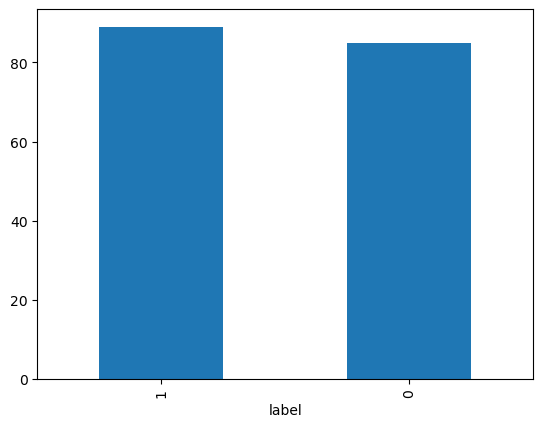

In [4]:
darwin_df['label'].value_counts().plot(kind='bar')
display(darwin_df['label'].value_counts())

The data appears to be balanced.

In [5]:
df_null = pd.DataFrame(darwin_df.isna().sum())
display(df_null)
print(df_null.loc[df_null[0] >0])

0
ID               0
air_time1        0
disp_index1      0
gmrt_in_air1     0
gmrt_on_paper1   0
...             ..
paper_time25     0
pressure_mean25  0
pressure_var25   0
total_time25     0
label            0

[452 rows x 1 columns]

Empty DataFrame
Columns: [0]
Index: []


There are no null values in the dataframe.

# Transforming and Splitting the Data

In [6]:
from sklearn.model_selection import train_test_split

split = darwin_df.drop(['ID'], axis=1)

X = split.loc[:, split.columns != 'label']
y = split['label']


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Computing required values
stand_scaler = StandardScaler()
stand_model = stand_scaler.fit(X)
stand_X = stand_model.transform(X)
 
# Print Standard scaled data
print(stand_X)

# Computing required values
minmax_scaler = MinMaxScaler()
minmax_model = minmax_scaler.fit(X)
minmax_X = minmax_model.transform(X)
 
# Print MinMax scaled data
print(minmax_X)


[[-0.03995818  0.81920081 -0.96428112 ...  0.37032387  2.34714617
  -0.03955186]
 [ 3.67080255  1.86319456 -0.99419127 ... -0.38618196  2.04090301
   0.27130989]
 [-0.24285325  0.16297617 -0.36928884 ... -0.61304649 -0.32902956
  -0.17190044]
 ...
 [-0.14536851 -0.41569466 -0.79672117 ...  0.8848363  -0.60574129
  -0.16298033]
 [-0.3094282  -0.53500823 -0.0444268  ...  0.8848363  -0.60574129
  -0.16298033]
 [-0.22105788 -0.46938576 -0.33747362 ...  0.8848363  -0.60574129
  -0.16298033]]
[[0.04636033 0.40646131 0.08079165 ... 0.83581735 0.82552264 0.02020101]
 [0.47238399 0.5379414  0.07597771 ... 0.67555935 0.77227526 0.04734748]
 [0.02306642 0.32381668 0.17655369 ... 0.62750042 0.36020824 0.00864348]
 ...
 [0.03425842 0.25093914 0.10775987 ... 0.94481154 0.31209558 0.00942244]
 [0.01542311 0.23591285 0.22883916 ... 0.94481154 0.31209558 0.00942244]
 [0.0255687  0.24417731 0.18167424 ... 0.94481154 0.31209558 0.00942244]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()

X_train_stand, X_test_stand, y_train_stand, y_test_stand = train_test_split(stand_X, y, test_size=0.2, random_state=42)
display(X_train_stand.shape, X_test_stand.shape, y_train_stand.shape, y_test_stand.shape)
print()

X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(stand_X, y, test_size=0.2, random_state=42)
display(X_train_mm.shape, X_test_mm.shape, y_train_mm.shape, y_test_mm.shape)

(139, 450)

(35, 450)

(139,)

(35,)

(139, 450)

(35, 450)

(139,)

(35,)

(139, 450)

(35, 450)

(139,)

(35,)

#### PCA for dimensionality reduction

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

# Check the shape of the reduced dataset
print(X_reduced_train.shape) 
print(X_reduced_test.shape) 

(139, 2)
(35, 2)


In [9]:
X_reduced_train_stand = pca.fit_transform(X_train_stand)
X_reduced_test_stand = pca.transform(X_test_stand)

# Check the shape of the reduced dataset
print(X_reduced_train_stand.shape) 
print(X_reduced_test_stand.shape) 

(139, 2)
(35, 2)


In [10]:
X_reduced_train_mm = pca.fit_transform(X_train_mm)
X_reduced_test_mm = pca.transform(X_test_mm)

# Check the shape of the reduced dataset
print(X_reduced_train_mm.shape) 
print(X_reduced_test_mm.shape) 

(139, 2)
(35, 2)


# Descriptive Statistics

In [11]:
summary=[]    
for column in X_train:
    vals= X_train[column].describe()
    summary.append(vals)

In [12]:
summary

[count       139.000000
 mean       5036.899281
 std       11358.675710
 min          65.000000
 25%        1717.500000
 50%        2785.000000
 75%        4287.500000
 max      109965.000000
 Name: air_time1, dtype: float64,
 count    139.000000
 mean       0.000010
 std        0.000004
 min        0.000002
 25%        0.000008
 50%        0.000009
 75%        0.000011
 max        0.000028
 Name: disp_index1, dtype: float64,
 count    139.000000
 mean     290.073429
 std      157.814583
 min       28.734515
 25%      177.407859
 50%      256.213992
 75%      355.833124
 max      875.811029
 Name: gmrt_in_air1, dtype: float64,
 count    139.000000
 mean     196.166672
 std      104.617552
 min       47.354990
 25%      139.092642
 50%      178.208024
 75%      227.445565
 max      865.210522
 Name: gmrt_on_paper1, dtype: float64,
 count      139.00000
 mean      2014.00000
 std       1786.08052
 min        786.00000
 25%       1350.00000
 50%       1694.00000
 75%       2102.00000
 max

In [13]:
darwin_stats = X_train.describe()
darwin_stats

air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
count     139.000000   139.000000    139.000000      139.000000   
mean     5036.899281     0.000010    290.073429      196.166672   
std     11358.675710     0.000004    157.814583      104.617552   
min        65.000000     0.000002     28.734515       47.354990   
25%      1717.500000     0.000008    177.407859      139.092642   
50%      2785.000000     0.000009    256.213992      178.208024   
75%      4287.500000     0.000011    355.833124      227.445565   
max    109965.000000     0.000028    875.811029      865.210522   

       max_x_extension1  max_y_extension1  mean_acc_in_air1  \
count         139.00000        139.000000        139.000000   
mean         2014.00000       7321.661871          0.385714   
std          1786.08052       2279.131644          0.321447   
min           786.00000        561.000000          0.067748   
25%          1350.00000       6130.000000          0.218299   
50%          1694.00000       6881.000000          0.272219   
75%          2102.00000       8293.000000          0.414842   
max         18602.00000      15783.000000          2.322357   

       mean_acc_on_paper1  mean_gmrt1  mean_jerk_in_air1  ...  mean_gmrt25  \
count          139.000000  139.000000         139.000000  ...   139.000000   
mean             0.178634  243.120051           0.061301  ...   222.527132   
std              0.065253  117.051931           0.062055  ...    65.087705   
min              0.096631   62.040839           0.011861  ...    69.928033   
25%              0.147785  161.197735           0.029635  ...   184.401552   
50%              0.162473  227.766015           0.038989  ...   216.118055   
75%              0.187857  293.105770           0.067452  ...   264.310776   
max              0.627350  745.909831           0.447805  ...   437.373267   

       mean_jerk_in_air25  mean_jerk_on_paper25  mean_speed_in_air25  \
count          139.000000            139.000000           139.000000   
mean             0.149698              0.020047             4.484372   
std              0.063817              0.002403             1.553983   
min              0.030169              0.014987             1.323565   
25%              0.108516              0.018385             3.493815   
50%              0.140747              0.019691             4.508709   
75%              0.201228              0.021198             5.262016   
max              0.375078              0.029227            10.416715   

       mean_speed_on_paper25  num_of_pendown25   paper_time25  \
count             139.000000        139.000000     139.000000   
mean                2.892914         85.071942   41933.381295   
std                 0.851080         26.547098   17498.587647   
min                 0.950249         32.000000   15930.000000   
25%                 2.409877         66.000000   33207.500000   
50%                 2.893938         81.000000   37180.000000   
75%                 3.335828         99.000000   45487.500000   
max                 5.602909        209.000000  139575.000000   

       pressure_mean25  pressure_var25  total_time25  
count       139.000000      139.000000  1.390000e+02  
mean       1647.227266   165652.733000  1.741498e+05  
std         302.175077    55863.914842  5.541100e+05  
min         558.595486    73010.320420  2.998000e+04  
25%        1518.419445   122536.489850  5.917500e+04  
50%        1735.817729   159928.452700  7.460500e+04  
75%        1867.326658   202318.210100  1.229400e+05  
max        1961.516027   352981.850000  5.704200e+06  

[8 rows x 450 columns]

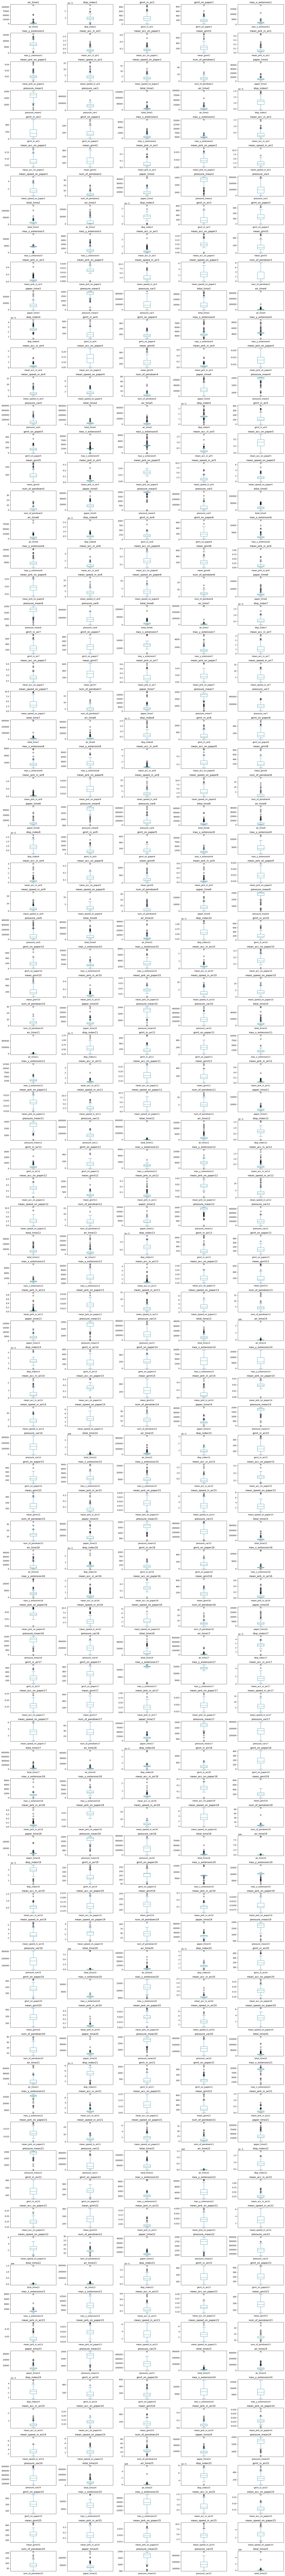

In [14]:
num_columns = len(X_train.columns)
num_rows = int(np.ceil(num_columns / 5))

fig, axes = plt.subplots(num_rows, 5, figsize=(20, 180))

axes = axes.flatten()

for i, column in enumerate(X_train.columns):
    X_train[column].plot(kind='box', ax=axes[i % (num_rows * 5)])
    axes[i % (num_rows * 5)].set_title(column)

for j in range(num_columns, num_rows * 5):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [15]:
skewValues = X_train.skew(axis=0)
print('A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution')
print('Minor positive skewness')
print(skewValues.loc[lambda x : (x > 0) & (x < 6)])
print()
print('Major positive skewness')
print(skewValues[skewValues > 5])
print()
print('A negative skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.')
print(skewValues[skewValues < 0])
print()
print('A skewness value of 0 in the output denotes a symmetrical distribution.')
print(skewValues[skewValues == 0])

A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution
Minor positive skewness
gmrt_in_air1             1.328585
gmrt_on_paper1           2.807744
max_y_extension1         0.732672
mean_acc_in_air1         3.750580
mean_acc_on_paper1       3.818330
                           ...   
mean_speed_in_air25      0.788444
mean_speed_on_paper25    0.373475
num_of_pendown25         1.440990
paper_time25             2.881399
pressure_var25           0.552212
Length: 356, dtype: float64

Major positive skewness
air_time1              6.985222
max_x_extension1       6.978987
paper_time1            6.283055
total_time1            7.462685
air_time2              5.305257
max_y_extension2       8.618401
air_time4              9.463724
mean_acc_in_air4       5.147293
mean_jerk_in_air4      5.009317
num_of_pendown4        5.619360
total_time4            7.268847
air_time7              6.254908
total_time7

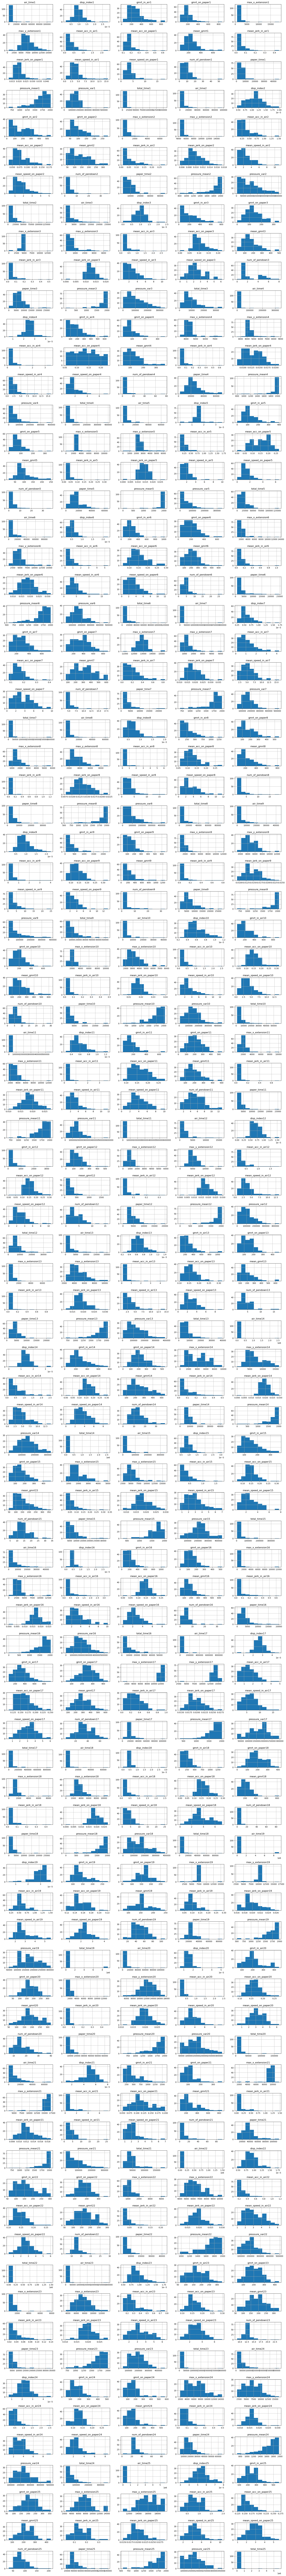

In [16]:
num_columns = len(X_train.columns)
num_rows = int(np.ceil(num_columns / 5))

fig, axes = plt.subplots(num_rows, 5, figsize=(20, 180))

axes = axes.flatten()

for i, column in enumerate(X_train.columns):
    X_train[column].hist(ax=axes[i % (num_rows * 5)])
    axes[i % (num_rows * 5)].set_title(column)

for j in range(num_columns, num_rows * 5):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Positive threshold results at 0.7

mean_acc_on_paper20    mean_speed_on_paper20    0.701462
mean_speed_on_paper20  mean_acc_on_paper20      0.701462
max_y_extension11      max_y_extension13        0.701814
max_y_extension13      max_y_extension11        0.701814
mean_speed_in_air8     mean_acc_in_air8         0.702374
                                                  ...   
total_time14           air_time14               0.999794
mean_jerk_in_air17     mean_acc_in_air17        0.999842
mean_acc_in_air17      mean_jerk_in_air17       0.999842
air_time19             total_time19             0.999992
total_time19           air_time19               0.999992
Length: 806, dtype: float64

Positive threshold results at 0.989999

mean_speed_on_paper12  gmrt_on_paper12          0.991111
gmrt_on_paper12        mean_speed_on_paper12    0.991111
mean_jerk_in_air23     mean_acc_in_air23        0.991899
mean_acc_in_air23      mean_jerk_in_air23       0.991899
mean_jerk_in_air10     mean_acc_in_air10

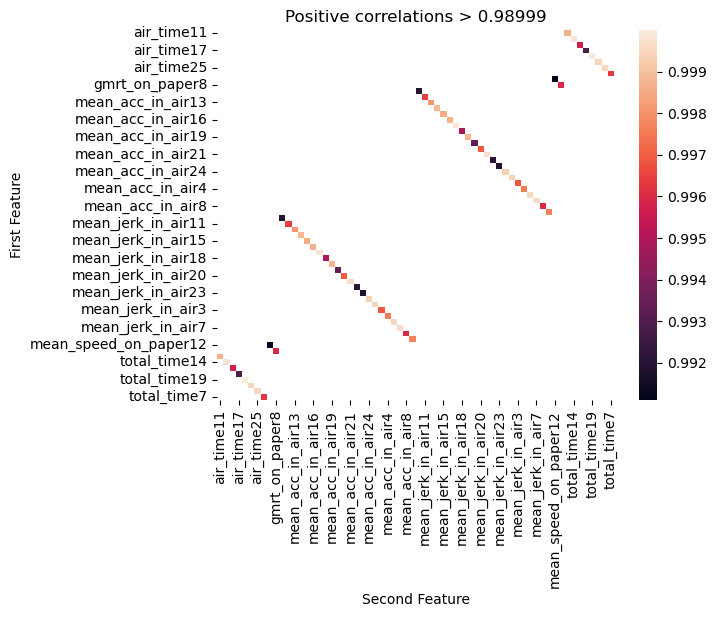

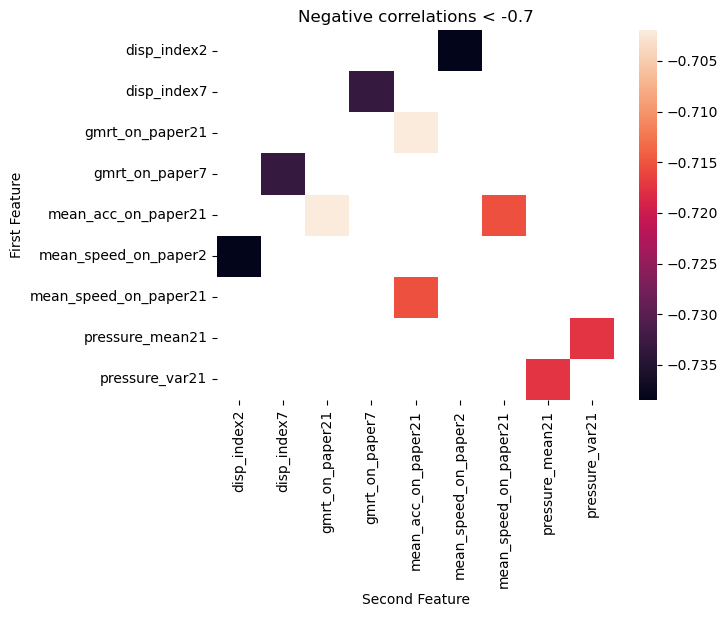

In [17]:
import seaborn as sns

train = pd.concat([X_train, y_train], axis=1)

pos_threshold_cm = 0.989999
pos_threshold = 0.7
neg_threshold = 0.7

correlation_matrix = train.corr()
correlation_matrix

pos_cor_mat = correlation_matrix[(correlation_matrix > pos_threshold_cm) & (correlation_matrix != 1)]
pos_seven = correlation_matrix[(correlation_matrix > pos_threshold) & (correlation_matrix != 1)]

print()
print('Positive threshold results at 0.7')
print()
pos_seven_sorted = pos_seven.unstack().sort_values().dropna()
print(pos_seven_sorted)

print()
print('Positive threshold results at 0.989999')
print()
pos_sorted_mat = pos_cor_mat.unstack().sort_values().dropna()
print(pos_sorted_mat)

pos_sorted_mat = pd.DataFrame(pos_sorted_mat)

pos_sorted_mat = pos_sorted_mat.reset_index()
pos_sorted_mat.columns =['First Feature', 'Second Feature', 'Correlation Score']
pos_sorted_mat = pos_sorted_mat.pivot(index="First Feature", columns="Second Feature", values="Correlation Score")

neg_cor_mat = correlation_matrix[(correlation_matrix < -neg_threshold) & (correlation_matrix != 1)]

print()
print('Negative threshold results at -0.7')
print()
neg_sorted_mat = neg_cor_mat.unstack().sort_values().dropna()
print(neg_sorted_mat)

neg_sorted_mat = pd.DataFrame(neg_sorted_mat)

neg_sorted_mat = neg_sorted_mat.reset_index()
neg_sorted_mat.columns =['First Feature', 'Second Feature', 'Correlation Score']
neg_sorted_mat = neg_sorted_mat.pivot(index="First Feature", columns="Second Feature", values="Correlation Score")

sns.heatmap(pos_sorted_mat)
plt.title('Positive correlations > 0.98999')
plt.show()
plt.title('Negative correlations < -0.7')
sns.heatmap(neg_sorted_mat)
plt.show()

There are many positively correlated values above 0.7, 758, displayed in the correlation matrix is thresholds above 0.989999 which is 68 features. The amount of negatively correlated features lower than -0.7, there are 6 features.

# Models

### Machine Learning Models

#### Support Vector Machine regular data

In [18]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [19]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  60.00
F1 (Polynomial Kernel):  47.69


In [20]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  42.86
F1 (RBF Kernel):  25.71


#### Support Vector Machine StandardScaler data

In [21]:
rbf_stand = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_stand, y_train_stand)
poly_stand = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train_stand, y_train_stand)

poly_pred_stand = poly_stand.predict(X_test_stand)
rbf_pred_stand = rbf_stand.predict(X_test_stand)

In [22]:
poly_accuracy_stand = accuracy_score(y_test_stand, poly_pred_stand)
poly_f1_stand = f1_score(y_test_stand, poly_pred_stand, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_stand*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_stand*100))

Accuracy (Polynomial Kernel):  57.14
F1 (Polynomial Kernel):  51.43


In [23]:
rbf_accuracy_stand = accuracy_score(y_test_stand, rbf_pred_stand)
rbf_f1_stand = f1_score(y_test_stand, rbf_pred_stand, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_stand*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_stand*100))

Accuracy (RBF Kernel):  42.86
F1 (RBF Kernel):  25.71


#### Support Vector Machine MinMaxScaler

In [24]:
rbf_mm = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_mm, y_train_mm)
poly_mm = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train_mm, y_train_mm)

poly_pred_mm = poly_stand.predict(X_test_mm)
rbf_pred_mm = rbf_stand.predict(X_test_mm)

In [25]:
poly_accuracy_mm = accuracy_score(y_test_mm, poly_pred_mm)
poly_f1_mm = f1_score(y_test_mm, poly_pred_mm, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_mm*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_mm*100))

Accuracy (Polynomial Kernel):  57.14
F1 (Polynomial Kernel):  51.43


In [26]:
rbf_accuracy_mm = accuracy_score(y_test_mm, rbf_pred_mm)
rbf_f1_mm = f1_score(y_test_mm, rbf_pred_mm, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_mm*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_mm*100))

Accuracy (RBF Kernel):  42.86
F1 (RBF Kernel):  25.71


#### Support Vector Machine and PCA

In [27]:
rbf_red = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_reduced_train, y_train)
poly_red = svm.SVC(kernel='poly', degree=3, C=1).fit(X_reduced_train, y_train)

poly_pred_red = poly_red.predict(X_reduced_test)
rbf_pred_red = rbf_red.predict(X_reduced_test)

In [28]:
poly_accuracy_red = accuracy_score(y_test, poly_pred_red)
poly_f1_red = f1_score(y_test, poly_pred_red, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_red*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_red*100))

Accuracy (Polynomial Kernel):  60.00
F1 (Polynomial Kernel):  47.69


In [29]:
rbf_accuracy_red = accuracy_score(y_test, rbf_pred_red)
rbf_f1_red = f1_score(y_test, rbf_pred_red, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_red*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_red*100))

Accuracy (RBF Kernel):  42.86
F1 (RBF Kernel):  25.71


#### Support Vector Machine StandardScaler and PCA

In [30]:
rbf_stand_red = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_reduced_train_stand, y_train_stand)
poly_stand_red = svm.SVC(kernel='poly', degree=3, C=1).fit(X_reduced_train_stand, y_train_stand)

poly_pred_stand_red = poly_stand_red.predict(X_reduced_test_stand)
rbf_pred_stand_red = rbf_stand_red.predict(X_reduced_test_stand)

In [31]:
poly_accuracy_stand_red = accuracy_score(y_test_stand, poly_pred_stand_red)
poly_f1_stand_red = f1_score(y_test_stand, poly_pred_stand_red, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_stand_red*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_stand_red*100))

Accuracy (Polynomial Kernel):  80.00
F1 (Polynomial Kernel):  80.00


In [32]:
rbf_accuracy_stand_red = accuracy_score(y_test_stand, rbf_pred_stand_red)
rbf_f1_stand_red = f1_score(y_test_stand, rbf_pred_stand_red, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_stand_red*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_stand_red*100))

Accuracy (RBF Kernel):  42.86
F1 (RBF Kernel):  25.71


#### Support Vector Machine MinMaxScaler and PCA

In [33]:
rbf_mm_red = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_reduced_train_mm, y_train_mm)
poly_mm_red = svm.SVC(kernel='poly', degree=3, C=1).fit(X_reduced_train_mm, y_train_mm)

poly_pred_mm_red = poly_mm_red.predict(X_reduced_test_mm)
rbf_pred_mm_red = rbf_mm_red.predict(X_reduced_test_mm)

In [34]:
poly_accuracy_mm_red = accuracy_score(y_test_mm, poly_pred_mm_red)
poly_f1_mm_red = f1_score(y_test_mm, poly_pred_mm_red, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_mm_red*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_mm_red*100))

Accuracy (Polynomial Kernel):  80.00
F1 (Polynomial Kernel):  80.00


In [35]:
rbf_accuracy_mm_red = accuracy_score(y_test_mm, rbf_pred_mm_red)
rbf_f1_mm_red = f1_score(y_test_mm, rbf_pred_mm_red, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_mm_red*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_mm_red*100))

Accuracy (RBF Kernel):  42.86
F1 (RBF Kernel):  25.71


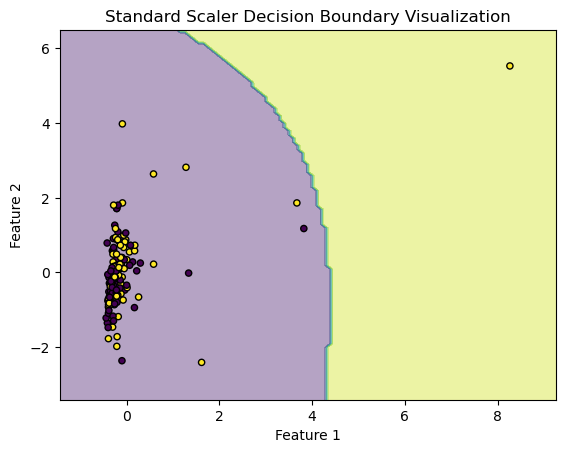

In [41]:
x_min, x_max = X_train_stand[:, 0].min() - 1, X_train_stand[:, 0].max() + 1
y_min, y_max = X_train_stand[:, 1].min() - 1, X_train_stand[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = poly_stand_red.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_stand[:, 0], X_train_stand[:, 1], c=y_train_stand, s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Standard Scaler Decision Boundary Visualization')
plt.show()

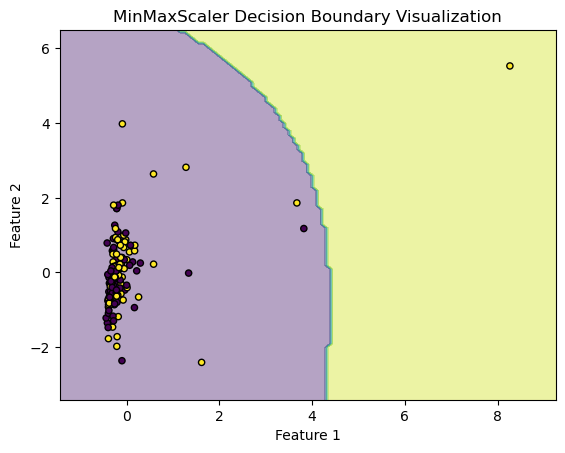

In [40]:
x_min, x_max = X_train_stand[:, 0].min() - 1, X_train_stand[:, 0].max() + 1
y_min, y_max = X_train_stand[:, 1].min() - 1, X_train_stand[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = poly_mm_red.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_stand[:, 0], X_train_stand[:, 1], c=y_train_stand, s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('MinMaxScaler Decision Boundary Visualization')
plt.show()